Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

#### <font color='orange'>Полезные ссылки:</font>
* Полезная лекция про временные ряды: https://www.youtube.com/watch?v=u433nrxdf5k .

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Отлично, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> 
    
   Привет. Спасибо за проверку.
    
Помоги прояснить ситуацию:
    
    
1. Если мы делим выборку на трейн и тест. То после подбора параметров, мы сравниваем наши модели с лучшими параметрами на кроссвалидации по трейн выбокре и смотрим лучушю оценку **среди моделей которые попали в условие задачи**. Далее модель с лучшей оценкой мы уже тестируем на тест выборке и смотрим на то как выполняется условие задачи - RMSE. 
    
2. Если трейн, валид и тест, то обучаем на трейне, предсказываем на валиде условие задачи - сравниваем лучшие модели по условию, и лучшую предсказываем на тест выборке и смотрим как она условие выполняет.
    
> Оба утверждения верны.
    
    
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> 
    
Ещё вопрос по кросс-валидации для бустеров:
    
    "Успех: Отлично, что для подбора параметров использовался метод основанный на кросс-валидации с подходящим под данные сплиттером."
    
Я не до конца понял, для чего нам кросс валидация на момент подробра параметров? Где её результат можно посмотреть и как его оценивать. Мы кросс валидацияю на момент подробра параметров только для бустингов осуществляем?
 
> Ты же печатала best_params_ – это лучшие параметры. best_score_ – это лучший скор.
    
    
    
</div>

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в доработке!

### <font color='orange'>Общее впечатление (ревью 3)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Удачи в дальнейшем обучении и следующих работах!

# Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нам нужно спрогнозировать количество заказов такси на следующий час. 


**Цель исследования:**

Построим модель для предсказания количество заказов такси на следующий час.

**Описание данных:**

Данные лежат в файле `/datasets/taxi.csv`. О качестве данных ничего не известно.

Количество заказов находится в столбце 'num_orders' (от англ. number of orders, «число заказов»).

**Ход исследования:** 

Таким образом, исследование пройдёт несколько этапов:
1. Загрузим данные и выполним их ресемплирование по одному часу.
2. Проанализируем данные.
3. Обучим разные модели с различными гиперпараметрами. Сделаем тестовую выборку размером 10% от исходных данных.
4. Проверьте данные на тестовой выборке и сделайте выводы.
 
 *Значение метрики RMSE на тестовой выборке должно быть не больше 48.*

## Загрузим данные и выполним их ресемплирование по одному часу.

Библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

from lightgbm import LGBMRegressor

from catboost import CatBoostRegressor

import time

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

RANDOM_STATE=12345

In [2]:
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в верхней части ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [3]:
try:
    df = pd.read_csv('/Users/roman/Desktop/Data Scientist/Practicum/Projects/3_taxi/taxi.csv', index_col=[0], parse_dates=[0])
except:
    print('что-то пошло не так')

In [4]:
df.head(5)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [6]:
df.duplicated().sum()

26415

Посмотрим на выбросы в столбцах:

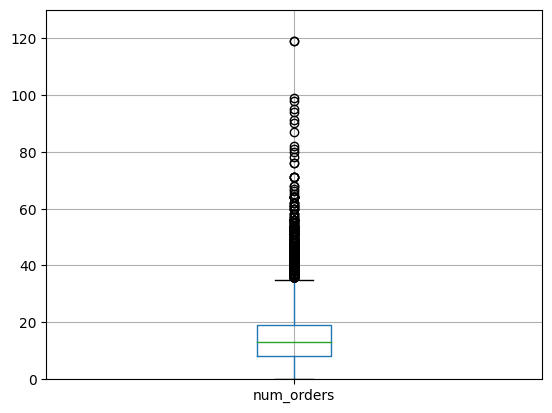

In [7]:
plt.ylim(0, 130)
df.boxplot(column=['num_orders'])
plt.show()

Обнаружено 2 выброса на 120 значений. Возможно, что это были заказы в праздничные дни. Удалим их.

In [8]:
df = df.query('num_orders < 101')
df.reset_index(drop=True)

,num_orders
0,9
1,14
2,28
3,20
4,32
...,...
26489,32
26490,24
26491,27
26492,39


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26494 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26494 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


**Вывод:**

* датасет содержит 2 столюбца и 26.5 тысяч записей. Вес 414 КВ.
* мы удалили выбросы в значениях столбца `num_orders`.
* данные не содержат пропусков, дубликатов и готовы к работе.

Посмотрим на распределение значений:

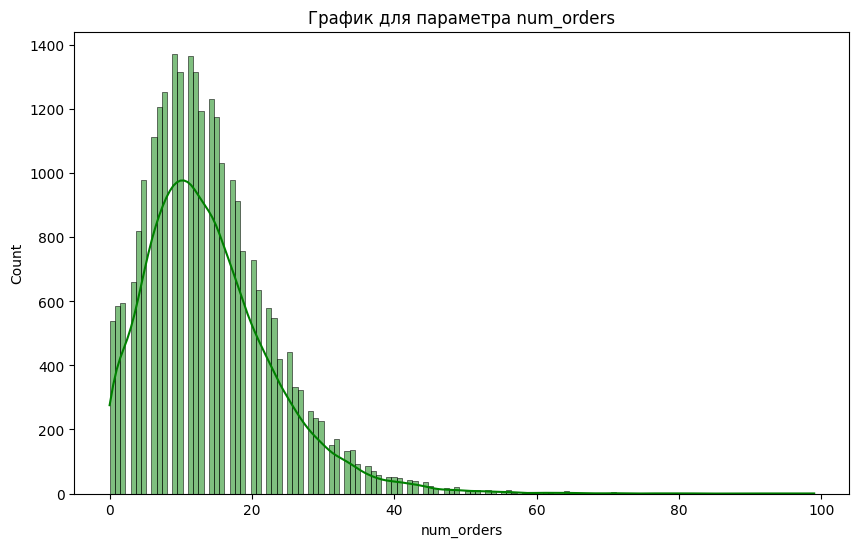

In [10]:
columns = ['num_orders']
for name in columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[name],
                 color='green',
                 kde=True)
    plt.title(f'График для параметра {name}')

    plt.show()

**Вывод:**

* среднее значение заказов около 10. 
* максимальное значение заказов по выборке 100. 

Выполним ресемплирование данных по одному часу:

In [11]:
df = df.resample('1H').sum()
display(df.head())
df.info()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно, первичный осмотр проведен. Ресемплинг был сделан верно.
</div>

## Проанализируем данные.

Проверим монотонность данных:

In [12]:
print(df.index.is_monotonic)

True


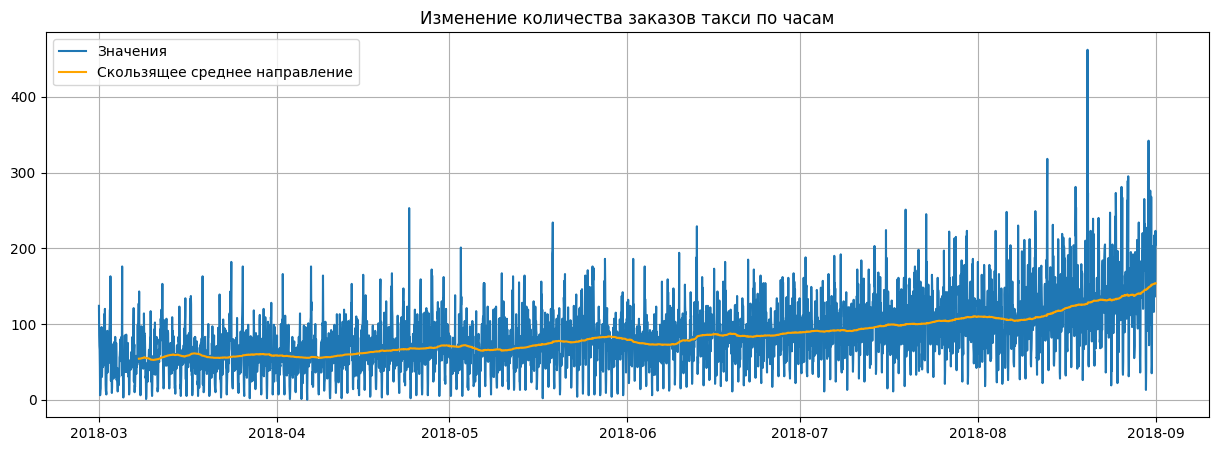

In [13]:
rolling_mean = df.rolling(24*7).mean()

plt.figure(figsize=(15,5))
plt.title("Изменение количества заказов такси по часам")

plt.plot(df, label="Значения")
plt.plot(rolling_mean, "g", label="Скользящее среднее направление", color='orange')
plt.legend(loc="upper left")
plt.grid(True)

С размером окна в 1 неделю мы видим, что происходит рост количества заказов такси.

Чтобы график корректно отобразился, указываем его оси ax, равными plt.gca() (англ. get current axis, получить текущие оси)

Оценим тренды и сезонность:

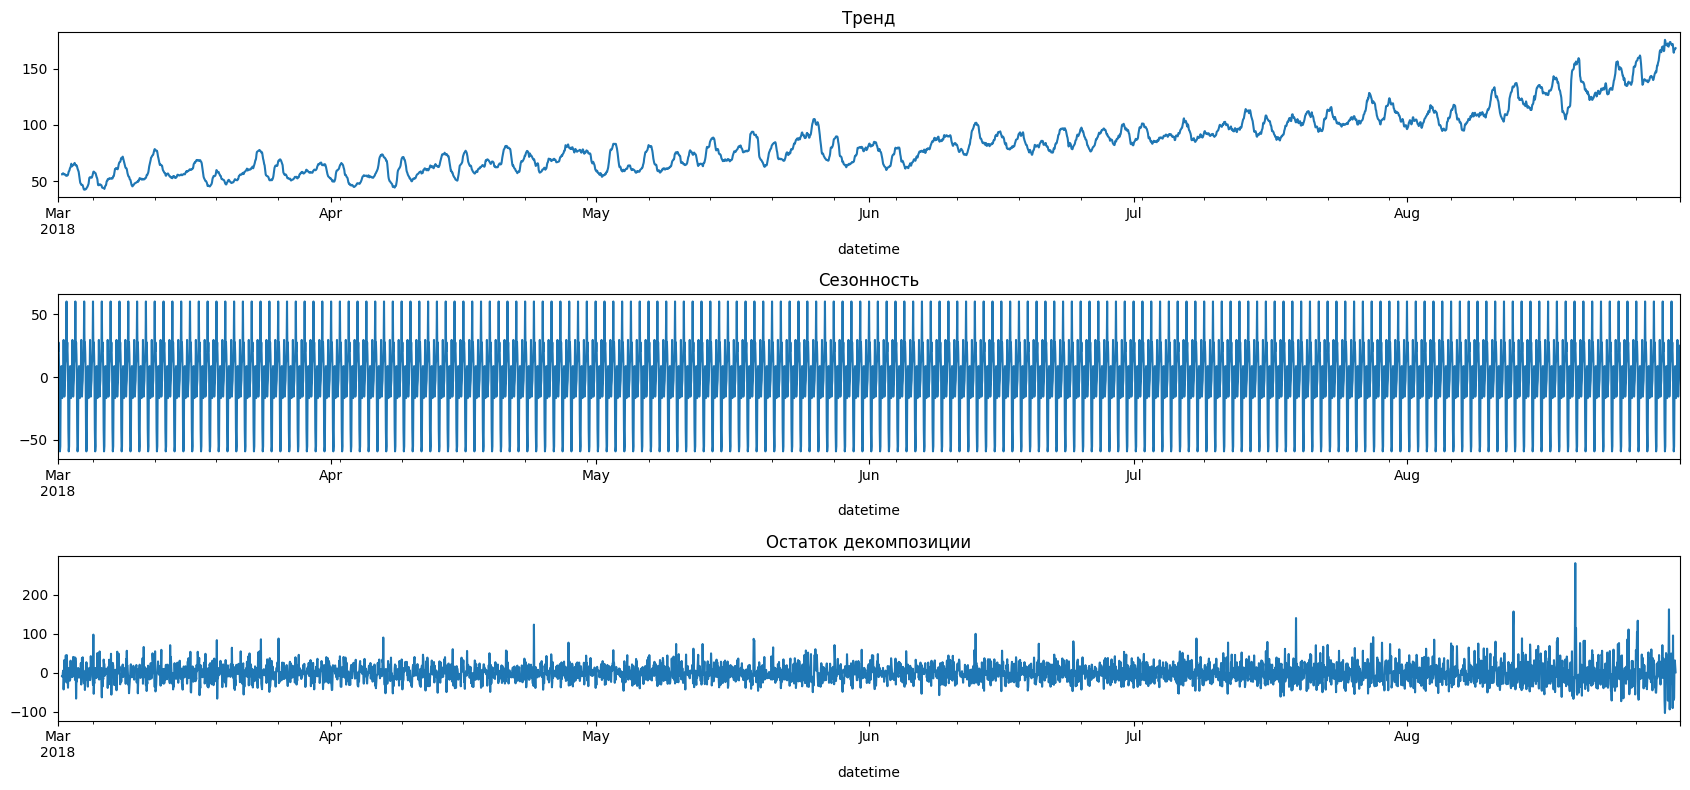

In [14]:
decomposed = seasonal_decompose(df) 

plt.figure(figsize=(17, 8))
plt.subplot(311)

decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Сезонность')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Остаток декомпозиции')
plt.tight_layout()

**Вывод:**

* график тренда подтвердил рост количества заказов
* график сезонности неинформативен. Посмотрим его детальнее.

<AxesSubplot:title={'center':'Сезонность заказов в течение суток'}, xlabel='datetime'>

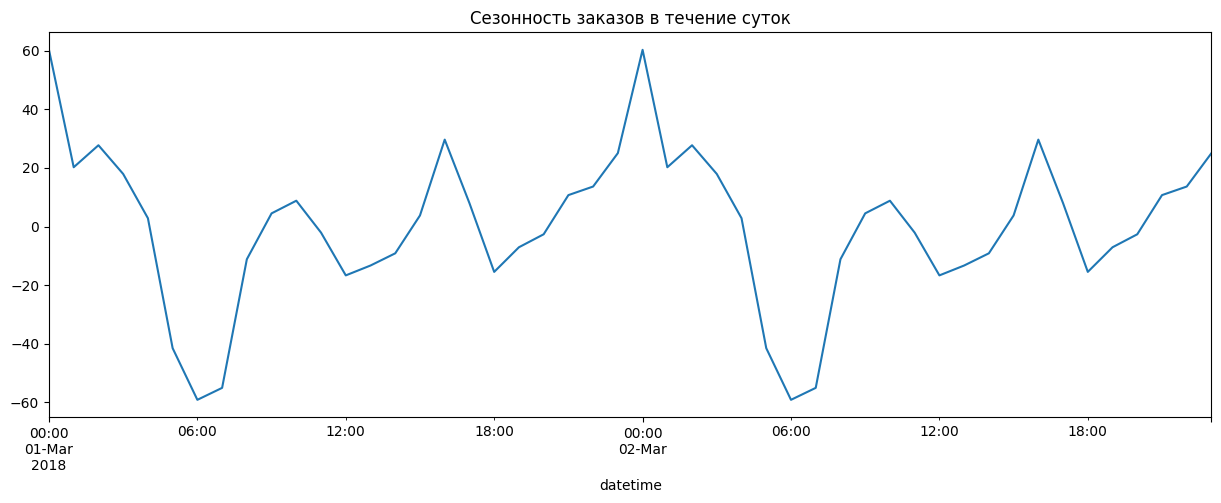

In [15]:
plt.figure(figsize=(15,5))
plt.title("Сезонность заказов в течение суток")
decomposed.seasonal['2018-03-01':'2018-03-2'].plot(ax=plt.gca())

**Вывод:**

Самый пик заказов приходится на полночь - люди возвращаются домой, спад идет перед утренними часами.

Проверим, можно ли назвать наш график стационарным, для этого используем тест Дики-Фуллера.

In [16]:
print('p-value гипотизы о нестационарности временного ряда составил',
      round(sm.tsa.stattools.adfuller(df['num_orders'])[1], 2))

p-value гипотизы о нестационарности временного ряда составил 0.03


В качестве критерия значимости возьмём 0.05, следовательно будем считать график стационарным.

**Вывод:**

Временной ряд монотонен и стационарен. Также был выделен тренд имеющий возрастающую зависимость от времени и сезонность по дням.

<div class="alert alert-block alert-success">
<b>Успех:</b> Декомпозиция была сделана верно. Хорошо, что сезонность была визуализирована на более коротком интервале!
</div>

## Обучим разные модели с различными гиперпараметрами.

Поскольку перед нами поставлена задача краткосрочного прогноза на час вперёд, то такие признаки как день недели, месяц и год включать не будем. Добавим остающие значения на 24 часа, скользяещее среднее с горизонтом в час, день и неделю.

In [17]:
def make_features(df, max_lag, rolling_mean_size):
    data = df.copy()
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
    return data

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо, что эта функция не изменяет глоабльную переменную.
</div>

In [18]:
df_1 = make_features(df, 2, 24)

In [19]:
df_1.head(30)

,num_orders,hour,dayofweek,rolling_mean,lag_1,lag_2
datetime,,,,,,
2018-03-01 00:00:00,124,0,3,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,3,NaN,124.000,NaN
2018-03-01 02:00:00,71,2,3,NaN,85.000,124.000
2018-03-01 03:00:00,66,3,3,NaN,71.000,85.000
2018-03-01 04:00:00,43,4,3,NaN,66.000,71.000
2018-03-01 05:00:00,6,5,3,NaN,43.000,66.000
2018-03-01 06:00:00,12,6,3,NaN,6.000,43.000
2018-03-01 07:00:00,15,7,3,NaN,12.000,6.000
2018-03-01 08:00:00,34,8,3,NaN,15.000,12.000


Разделим данные на обучающую и тестовые выборки и проверим корректность деления.

In [20]:
train, test = train_test_split(df_1, shuffle=False, test_size=0.1)

print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2018-03-01 00:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00


Избавимся от пропусков в трейне.

In [21]:
train.dropna(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3950 entries, 2018-03-02 00:00:00 to 2018-08-13 13:00:00
Freq: H
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    3950 non-null   int64  
 1   hour          3950 non-null   int64  
 2   dayofweek     3950 non-null   int64  
 3   rolling_mean  3950 non-null   float64
 4   lag_1         3950 non-null   float64
 5   lag_2         3950 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 216.0 KB


Создадим обучающие и целевой признак.

In [22]:
target_train = train['num_orders']
features_train = train.drop('num_orders', axis=1)
target_test = test['num_orders']
features_test = test.drop('num_orders', axis=1)

Напишем функцию для вычисления метрики RMSE:

In [23]:
def rmse_score (target, predictions):
    rmse = mean_squared_error(target, predictions)**0.5
    return rmse
scorer = make_scorer(rmse_score, greater_is_better=False)

<div class="alert alert-block alert-success">
<b>Успех:</b> Разбиение было сделано корректно.
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что scaler был обучен только на треине!
</div>

### Линейная регрессия

Созадим 4 модели: линейная регрессия, случайный лес, LightGBM, CatBoost.

Найдём гиперпараметры при помощи методов TimeSeriesSplit и RandoSearchCV:

In [24]:
tscv = TimeSeriesSplit(n_splits=8)

In [25]:
'''model = LinearRegression()
linear_parameters = {'fit_intercept':[True,False], 'positive':[True,False]}
linear_grid = RandomizedSearchCV(model,
                          linear_parameters,
                          cv=tscv,
                          scoring=scorer,
                          verbose=5,
                          n_jobs=-1)
linear_grid.fit(features_train, target_train)
print("RMSE линейной регрессии составляет:", -linear_grid.best_score_)
print('Наилучшие подобранные параметры для линейной регрессии:', linear_grid.best_params_)
'''

'model = LinearRegression()\nlinear_parameters = {\'fit_intercept\':[True,False], \'positive\':[True,False]}\nlinear_grid = RandomizedSearchCV(model,\n                          linear_parameters,\n                          cv=tscv,\n                          scoring=scorer,\n                          verbose=5,\n                          n_jobs=-1)\nlinear_grid.fit(features_train, target_train)\nprint("RMSE линейной регрессии составляет:", -linear_grid.best_score_)\nprint(\'Наилучшие подобранные параметры для линейной регрессии:\', linear_grid.best_params_)\n'

<div class="alert alert-info">
<h1> Комментарий студента №1</h1>
ч.1
Привет. Запутался немного в кросс-валидации. Как вообще расценивать отрицательно значение? 
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что для подбора параметров использовался метод основанный на кросс-валидации с подходящим под данные сплиттером.
</div>

<div class="alert alert-block alert-info">
<b>Совет (ревью 2): </b> Комментарий выше про RandomizedSearchCV. Лучше параметры были в best_params_ .
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> В sklearn принято, что оценка - это то, что нужно максимизировать (например accuracy). RMSE - функция потерь для минимизации, поэтому мы меняем знак внутри поиска. Получается, что максимизация -Х эквивалентна минимизации самого Х.
</div>

<div class="alert alert-info">
<h1> Комментарий студента №1</h1>

ч.2 Если подставляю обычную модель без параметров, то оценка лучше..
</div>

Лучший RMSE 31.17 получен для параметров: {'positive': True, 'fit_intercept': False}. 

**Отметим, что параметры в выводах могут отличаться от фактических значений под моделями ввиду наличия новых компеляций с проектом**

<div class="alert alert-block alert-info">
<b>Совет: </b> А это R2 – она используется по умолчанию. Ее нужно максимизировать.
</div>

### Случайный лес

In [28]:
'''forest = RandomForestRegressor(random_state=RANDOM_STATE)
    
forest_params = {'n_estimators': range(50, 200, 15),
                 'max_depth': range(1,20)}

forest_grid = RandomizedSearchCV(forest,
                                 forest_params,
                                 cv=tscv,
                                 scoring=scorer,
                                 verbose=5,
                                 n_jobs=-1)
forest_grid.fit(features_train, target_train)

print("RMSE для случайного леса составляет:", -forest_grid.best_score_)
print('Наилучшие подобранные параметры для случайного леса:', forest_grid.best_params_)'''

'forest = RandomForestRegressor(random_state=RANDOM_STATE)\n    \nforest_params = {\'n_estimators\': range(50, 200, 15),\n                 \'max_depth\': range(1,20)}\n\nforest_grid = RandomizedSearchCV(forest,\n                                 forest_params,\n                                 cv=tscv,\n                                 scoring=scorer,\n                                 verbose=5,\n                                 n_jobs=-1)\nforest_grid.fit(features_train, target_train)\n\nprint("RMSE для случайного леса составляет:", -forest_grid.best_score_)\nprint(\'Наилучшие подобранные параметры для случайного леса:\', forest_grid.best_params_)'

Лучший RMSE 24.26 для случайного леса получен для параметров: {'n_estimators': 80, 'max_depth': 18

### Light GBM

In [29]:
'''gbm = LGBMRegressor(random_state=RANDOM_STATE)
    
g_params = {'n_estimators': [50, 100, 500],
              'num_leaves': [21, 31, 41], 
              'learning_rate':[0.01, .04, 0.06]}

g_grid = RandomizedSearchCV(gbm,
                            g_params,
                            cv=tscv,
                            verbose=5,
                            scoring=scorer)

g_grid.fit(features_train, target_train)
print("RMSE для LGBM составляет ", -g_grid.best_score_)
print('Наилучшие подобранные параметры для LGBM:', g_grid.best_params_)'''

'gbm = LGBMRegressor(random_state=RANDOM_STATE)\n    \ng_params = {\'n_estimators\': [50, 100, 500],\n              \'num_leaves\': [21, 31, 41], \n              \'learning_rate\':[0.01, .04, 0.06]}\n\ng_grid = RandomizedSearchCV(gbm,\n                            g_params,\n                            cv=tscv,\n                            verbose=5,\n                            scoring=scorer)\n\ng_grid.fit(features_train, target_train)\nprint("RMSE для LGBM составляет ", -g_grid.best_score_)\nprint(\'Наилучшие подобранные параметры для LGBM:\', g_grid.best_params_)'

Лучший RMSE 24.12 для LGBM получен для параметров: {'num_leaves': 21, 'n_estimators': 100, 'learning_rate': 0.06}.

### CatBoost

In [30]:
'''cbr = CatBoostRegressor(loss_function="RMSE")

grid = {'learning_rate': [0.03, 0.1, 0.5],
        'iterations': [100, 200, 500]}

cbr_grid = RandomizedSearchCV(cbr,
                              grid,
                              cv=tscv,
                              verbose=5,
                              scoring=scorer)

cbr_grid.fit(features_train, target_train)

print("RMSE для CBR составляет:", -cbr_grid.best_score_)
print('Наилучшие подобранные параметры для CBR:', cbr_grid.best_params_)'''

'cbr = CatBoostRegressor(loss_function="RMSE")\n\ngrid = {\'learning_rate\': [0.03, 0.1, 0.5],\n        \'iterations\': [100, 200, 500]}\n\ncbr_grid = RandomizedSearchCV(cbr,\n                              grid,\n                              cv=tscv,\n                              verbose=5,\n                              scoring=scorer)\n\ncbr_grid.fit(features_train, target_train)\n\nprint("RMSE для CBR составляет:", -cbr_grid.best_score_)\nprint(\'Наилучшие подобранные параметры для CBR:\', cbr_grid.best_params_)'

Лучший RMSE 24.30 для CBR получен для параметров: '{'learning_rate': 0.1, 'iterations': 200}

**Вывод:**

Обучены и подобраны гиперпараметры для 4 различных моделей: линейная регрессия, случайный лес, CatBoost, LightGBM. Для всех моделей была применена кросс-валидация с применением метода TimeSeriesSplit.
    
* худший результат был получен с помощью линейной регрессии 31.17
* лучший - с помощью LGBM 24.12

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что попробовал разные модели в этом шаге!
</div>

## Проверьте данные на тестовой выборке и сделайте выводы.

Создадим таблицу для хранения результатов:

In [31]:
table = {'model': [], 'RMSE':[], 'fit_time': [], 'predict_time':[], 'cross_val_score':[]}
results = pd.DataFrame(data=table)
results

,model,RMSE,fit_time,predict_time,cross_val_score


Напишем функцию для расчета необходимых параметров:

In [32]:
def ml(model, features_train, target_train):
    start_fit_time = time.time()
    model.fit(features_train, target_train)
    stop_fit_time = time.time()
    
    fit_time = stop_fit_time - start_fit_time
    
    start_predict_time = time.time()
    predictions = model.predict(features_train)
    
    stop_predict_time = time.time()
    
    pred_time = stop_predict_time - start_predict_time
    
    rmse = mean_squared_error(target_train, predictions)**0.5
    
    scores = cross_val_score(model, features_train, target_train, cv=5)
    final_score = sum(scores) / len(scores)           
    
    return rmse, fit_time, pred_time, final_score

Напишем функцию для добавления результатов в таблицу:

In [33]:
def model_results(model_name,
                  model,
                  features_train,
                  target_train):
    rmse, fit_time, pred_time, final_score = ml(model,
                                               features_train,
                                               target_train)
    results.loc[len(results)] = [model_name,
                                 rmse,
                                 fit_time,
                                 pred_time,
                                final_score]
    if len(results) > 0:
        results.drop_duplicates(inplace=True)

Напишем функцию для расчета необходимых параметров:

In [34]:
def plot_test (model, model_name):
    plt.figure(figsize=(15,5))
    plt.title("Сравнение реальных значений и предсказанных с помощью модели " + model_name)
    plt.plot(target_train['2018-05-01':'2018-05-8'], label='Фактические значения')
    predictions = model.predict(features_train)
    predictions = pd.Series(predictions, index=target_train.index)
    plt.plot(predictions['2018-05-01':'2018-05-8'], label ='Значения предсказаний')
    plt.legend(loc="upper left")
    plt.grid(True) 

### Линейная регрессия:

,model,RMSE,fit_time,predict_time,cross_val_score
0,LinearRegression,30.660,0.005,0.001,0.201


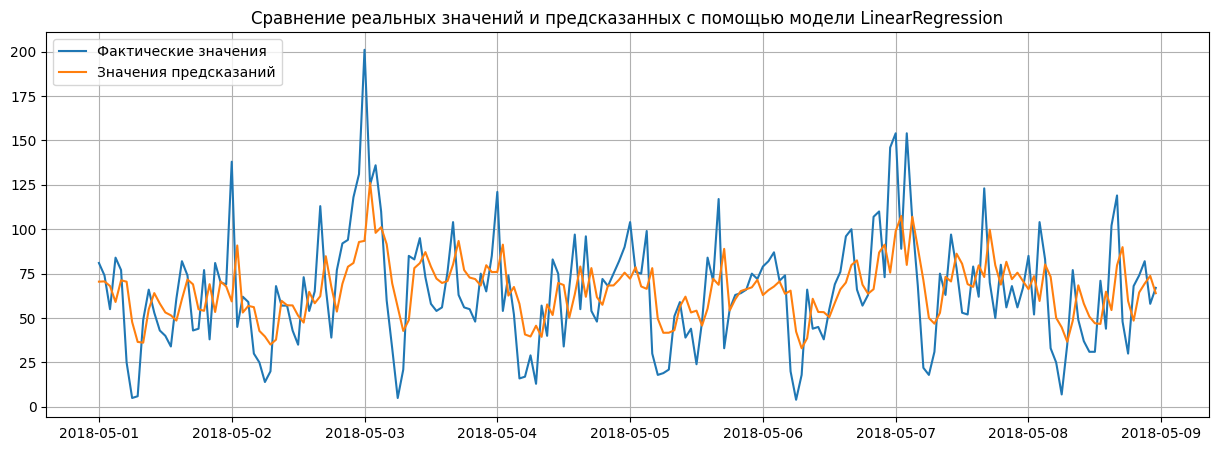

In [35]:
lr = LinearRegression(fit_intercept=False, positive=True)

model_results('LinearRegression',
          lr,
          features_train,
          target_train)

display(results)
plot_test(lr, 'LinearRegression')

**Вывод:**

Линейная регрессия превысила допустимое значение RMSE. На графиках видно, что модель ошибается в точках максимальных и минимальных значений.

### Cлучайный лес:

,model,RMSE,fit_time,predict_time,cross_val_score
0,LinearRegression,30.660,0.005,0.001,0.201
1,RandomForestRegressor,8.663,0.618,0.036,0.467


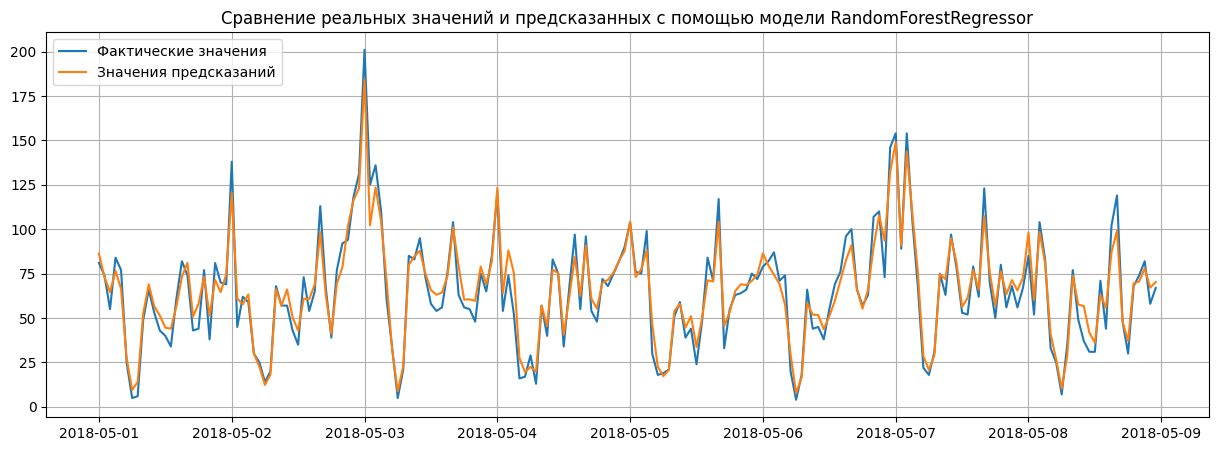

In [36]:
rf = RandomForestRegressor(max_depth=18, n_estimators=80, random_state=RANDOM_STATE)
model_results('RandomForestRegressor',
          rf,
          features_train,
          target_train)

display(results)
plot_test(rf, 'RandomForestRegressor')

**Вывод:**

Лучшее значение RMSE.

### Light GBM

,model,RMSE,fit_time,predict_time,cross_val_score
0,LinearRegression,30.660,0.005,0.001,0.201
1,RandomForestRegressor,8.663,0.618,0.036,0.467
2,LGBMRegressor,19.058,0.051,0.008,0.522


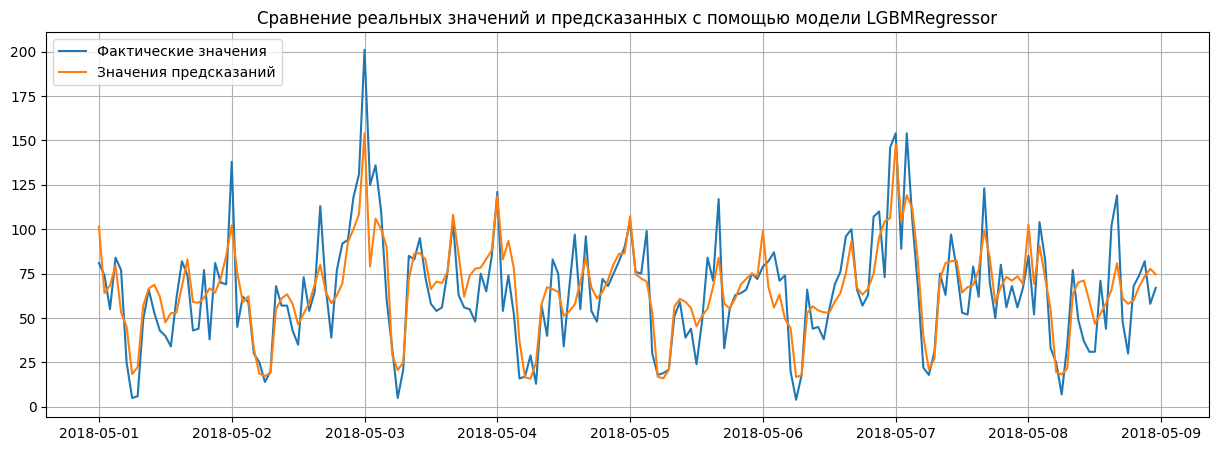

In [37]:
lgbm = LGBMRegressor(learning_rate=0.06,
                     n_estimators=100,
                     num_leaves=21,
                     random_state=RANDOM_STATE)
model_results('LGBMRegressor',
          lgbm,
          features_train,
          target_train)

display(results)
plot_test(lgbm, 'LGBMRegressor')

**Вывод:**

LGBM не превысила допустимое значение RMSE. Лучшее значение cross_val_score.

### CatBoost

0:	learn: 38.2483421	total: 59.6ms	remaining: 11.9s
1:	learn: 38.0543844	total: 60.6ms	remaining: 6s
2:	learn: 37.8864192	total: 61.4ms	remaining: 4.03s
3:	learn: 37.7169508	total: 62.2ms	remaining: 3.05s
4:	learn: 37.5334829	total: 63.1ms	remaining: 2.46s
5:	learn: 37.3594115	total: 63.9ms	remaining: 2.06s
6:	learn: 37.1987781	total: 64.8ms	remaining: 1.79s
7:	learn: 37.0382919	total: 65.6ms	remaining: 1.57s
8:	learn: 36.8704562	total: 66.5ms	remaining: 1.41s
9:	learn: 36.7137958	total: 67.3ms	remaining: 1.28s
10:	learn: 36.5449703	total: 68.1ms	remaining: 1.17s
11:	learn: 36.3776171	total: 69ms	remaining: 1.08s
12:	learn: 36.2133428	total: 69.8ms	remaining: 1s
13:	learn: 36.0772629	total: 70.8ms	remaining: 940ms
14:	learn: 35.9117446	total: 71.6ms	remaining: 883ms
15:	learn: 35.7534325	total: 72.4ms	remaining: 833ms
16:	learn: 35.5980185	total: 73.2ms	remaining: 788ms
17:	learn: 35.4383536	total: 74ms	remaining: 749ms
18:	learn: 35.2895263	total: 74.8ms	remaining: 713ms
19:	learn: 35

,model,RMSE,fit_time,predict_time,cross_val_score
0,LinearRegression,30.660,0.005,0.001,0.201
1,RandomForestRegressor,8.663,0.618,0.036,0.467
2,LGBMRegressor,19.058,0.051,0.008,0.522
3,CatBoostRegressor,24.970,0.249,0.001,0.370


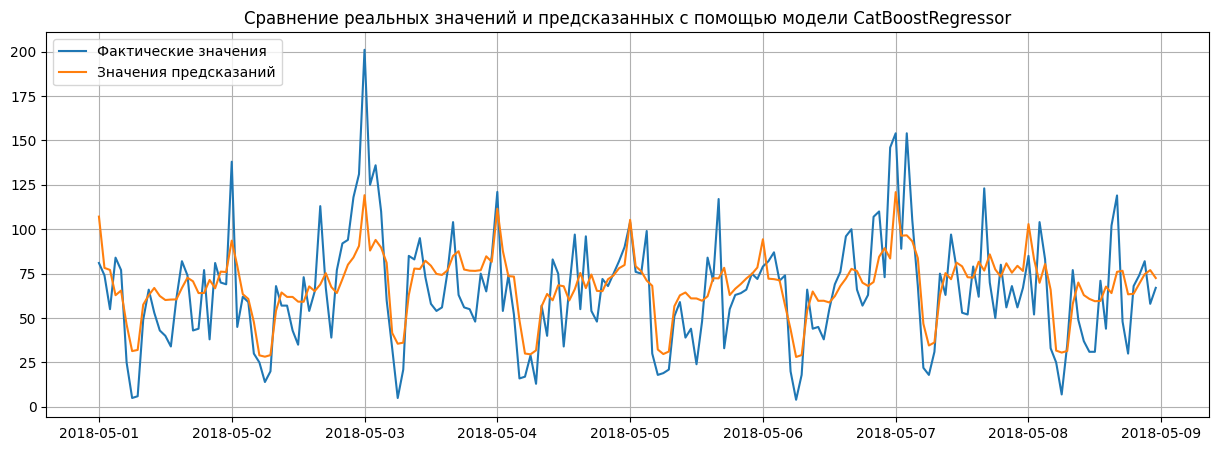

In [38]:
cb = CatBoostRegressor(loss_function="RMSE",
                         learning_rate=0.01, 
                         iterations=200,
                         random_state=RANDOM_STATE)
model_results('CatBoostRegressor',
          cb,
          features_train,
          target_train)

display(results)
plot_test(cb, 'CatBoostRegressor')

**Вывод:**

CatBoost не превысила допустимое значение RMSE.

Измерим лучшую модель LGBMRegressor на тестовой выборке:

In [40]:
lgbm = LGBMRegressor(learning_rate=0.06,
                     n_estimators=100,
                     num_leaves=21,
                     random_state=RANDOM_STATE)

lgbm.fit(features_train, target_train)

predictions_test = lgbm.predict(features_test)
rmse = mean_squared_error(target_test, predictions_test)**0.5
print('RMSE:', rmse)

RMSE: 44.87558318189114


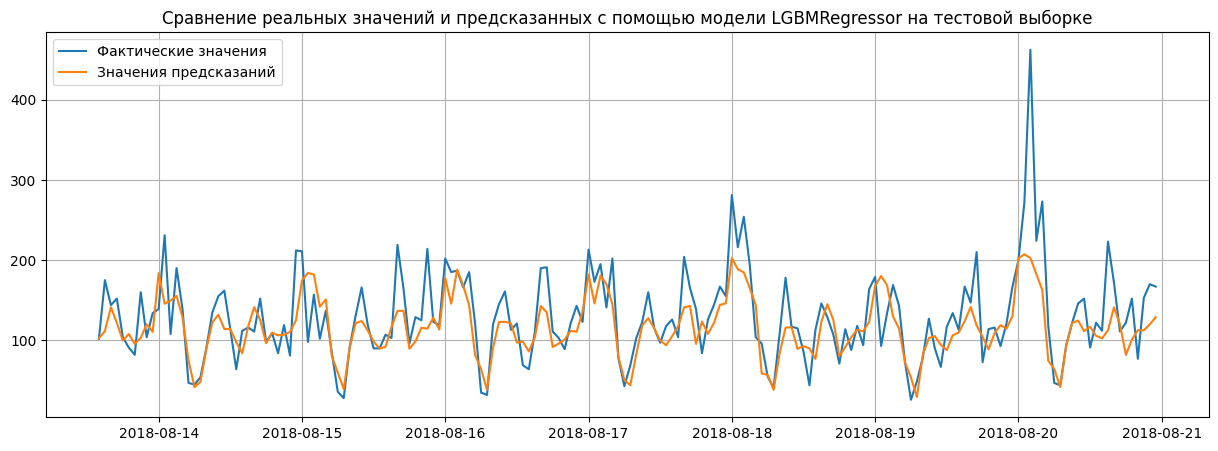

In [53]:
plt.figure(figsize=(15,5))
plt.title("Сравнение реальных значений и предсказанных с помощью модели LGBMRegressor на тестовой выборке")
plt.plot(target_test['2018-07-15':'2018-08-20'], label='Фактические значения')
predictions = lgbm.predict(features_test)
predictions = pd.Series(predictions, index=target_test.index)
plt.plot(predictions['2018-07-15':'2018-08-20'], label ='Значения предсказаний')
plt.legend(loc="upper left")
plt.grid(True)

**Вывод:**

Значение лучшей модели на тестовой выборке соответствуют заданному условию. Модель успешно прошла тестирование.

<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо, что предсказания были визуализированы!
</div>


<div class="alert alert-block alert-danger">
<b>Ошибка:</b> На тестовой выборке нужно измерить только одну – лучшую модель. Сравнение моделей нужно провести на кросс-валидации/валидационной выборке.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента №2:</b> Исправил. Все модели в процессе анализа оцениваются по кросс-валидации на тренеровочной выборке. Лучшая модель была протестирвоана на тестовой выборке. Выводы переделал.
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка (ревью 2):</b> На этапе тестирования нужно обучить модель на треине и измерить качество на тесте. Применять кросс-валидацию уже не нужно. Внутри кросс-валидации происходит обучение модели на подчасти переданной в нее выборки (в данном случае у тебя это тест).
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий (ревью 3):</b> Исправил
</div>

## Вывод

Данные были обработаны, что позволило получить нам монотонный и стационарный временной ряд. Также был выделен тренд имеющий возрастающую зависимость от времени и сезонность по дням. Мы обучили и подобрали гиперпараметры для 4 различных моделей: линейная регрессия, случайный лес, CatBoost, LightGBM. Для всех моделей была применена кросс-валидация в процессе анализа. Успешно протестировали лучшую модель случайного леса.

Мы рекомендуем модель LightGBM, которая успешно вошла в заданный интервал RMSE на тестовой выборке.

<div class="alert alert-block alert-success">
<b>Успех:</b> Приятно видеть вывод в конце проекта!
</div>